In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
import os
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_48051/3244023466.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ds_version = "road_scenery_experiment"
root_data_path = os.path.join("..", "data", ds_version)
data_path = os.path.join(root_data_path, "metadata")

In [3]:
# avg pool 1
file_name = "effnet_scenery_prediction-road_scenery_v_v5-20250222_210217.csv"

# avg pool 6

# crop None


In [4]:
pred = pd.DataFrame()
# surface = file_name.split("_")[0]
print(f"reading {file_name}")
df = pd.read_csv(os.path.join(data_path, file_name))
# df["surface_pred"] = surface
pred = pd.concat([pred, df])

pred.rename(columns={"Image": "image_id", "Prediction": "scenery_probability", "Level_0": "scenery_label_pred"}, inplace=True)

reading effnet_scenery_prediction-road_scenery_v_v5-20250222_210217.csv


In [5]:
pred

,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
0,1000927687276860,0.976152,scenery,1_1_road__1_1_road_general,0
1,1000927687276860,0.000158,scenery,1_2_bicycle__1_2_cycleway,0
2,1000927687276860,0.000112,scenery,1_2_bicycle__1_2_lane,0
3,1000927687276860,0.001921,scenery,1_3_pedestrian__1_3_footway,0
4,1000927687276860,0.019730,scenery,1_4_path__1_4_path_unspecified,0
...,...,...,...,...,...
43645,988054072097833,0.000222,scenery,1_2_bicycle__1_2_cycleway,0
43646,988054072097833,0.000027,scenery,1_2_bicycle__1_2_lane,0
43647,988054072097833,0.001931,scenery,1_3_pedestrian__1_3_footway,0
43648,988054072097833,0.008575,scenery,1_4_path__1_4_path_unspecified,0


In [6]:
# the prediction holds a value for each surface and a class probability. Only keep the highest prob.
idx = pred.groupby("image_id")["scenery_probability"].idxmax()
pred = pred.loc[idx]
pred


,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
16909,102491565788586,0.972168,scenery,1_2_bicycle__1_2_cycleway,0
20205,103194292097226,0.994555,scenery,1_3_pedestrian__1_3_footway,0
237,103629748692983,0.543528,scenery,1_3_pedestrian__1_3_footway,0
19322,105366992004127,0.999651,scenery,1_2_bicycle__1_2_lane,0
330,106106185328228,0.993678,scenery,1_1_road__1_1_road_general,0
...,...,...,...,...,...
14490,7689494587769097,0.999479,scenery,1_1_road__1_1_road_general,0
36460,8336520079756359,0.999548,scenery,1_4_path__1_4_path_unspecified,0
15798,8816216721736969,0.997314,scenery,1_1_road__1_1_road_general,1
16013,9101355396601639,0.695339,scenery,2_1_no_focus_no_street__2_1_all,1


In [7]:
annot = pd.read_csv(os.path.join(data_path, "annotations_scenery_v5.csv"))
annot.rename(columns={"road_scenery": "scenery_label_true"}, inplace=True)

In [8]:
df = pred.set_index("image_id").join(annot[["image_id", "scenery_label_true"]].set_index("image_id"), how="left")
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102491565788586,0.972168,scenery,1_2_bicycle__1_2_cycleway,0,1_2_bicycle__1_2_cycleway
103194292097226,0.994555,scenery,1_3_pedestrian__1_3_footway,0,1_3_pedestrian__1_3_footway
103629748692983,0.543528,scenery,1_3_pedestrian__1_3_footway,0,1_1_road__1_1_road_general
105366992004127,0.999651,scenery,1_2_bicycle__1_2_lane,0,1_2_bicycle__1_2_lane
106106185328228,0.993678,scenery,1_1_road__1_1_road_general,0,1_1_road__1_1_road_general
...,...,...,...,...,...
7689494587769097,0.999479,scenery,1_1_road__1_1_road_general,0,1_1_road__1_1_road_general
8336520079756359,0.999548,scenery,1_4_path__1_4_path_unspecified,0,1_4_path__1_4_path_unspecified
8816216721736969,0.997314,scenery,1_1_road__1_1_road_general,1,1_1_road__1_1_road_general


In [9]:
# exclude not recognizable
# df = df[df.surface_true.notna()]

In [10]:
df.groupby(["image_id"]).size().sort_values(ascending=False)

image_id
102491565788586      1
895053284379158      1
902423417272904      1
902334713832644      1
901978423868715      1
                    ..
428515959343959      1
425439738589038      1
424723136081973      1
422928698771011      1
24272315469049348    1
Length: 7275, dtype: int64

In [11]:
df.groupby(["scenery_label_true"]).size()

scenery_label_true
1_1_road__1_1_road_general         2810
1_2_bicycle__1_2_cycleway           409
1_2_bicycle__1_2_lane               146
1_3_pedestrian__1_3_footway         549
1_4_path__1_4_path_unspecified     2374
2_1_no_focus_no_street__2_1_all     987
dtype: int64

In [12]:
df_valid = df[df.is_in_validation == 1]
df_train = df[df.is_in_validation == 0]

In [13]:
# df.groupby(["is_in_validation", "scenery_label_true"]).size().to_csv("test.csv")

## Global measures

In [14]:
def compute_measures(true_label, pred_label):
    m = {
    "accuracy": sum(true_label == pred_label) / len(true_label),
    # "correlation": np.corrcoef(true_float, pred_float)[0, 1],
    # "r_square": r2_score(true_float, pred_float),
    # "mse": mean_squared_error(true_float, pred_float)
    }
    # m["rmse"] = np.sqrt(m["mse"])
    return m

In [15]:
# all
gm = compute_measures(df.scenery_label_true, df.scenery_label_pred)
gm_valid = compute_measures(df_valid.scenery_label_true, df_valid.scenery_label_pred)
gm_train = compute_measures(df_train.scenery_label_true, df_train.scenery_label_pred)
pd.concat([pd.Series(gm, name="all"), pd.Series(gm_valid, name="validation"), pd.Series(gm_train, name="train")], axis=1).round(2)

,all,validation,train
accuracy,0.95,0.87,0.97


In [16]:
from sklearn.metrics import classification_report

report = classification_report(df_train.scenery_label_true, df_train.scenery_label_pred)
print(report)

                                 precision    recall  f1-score   support

     1_1_road__1_1_road_general       0.98      0.98      0.98      2248
      1_2_bicycle__1_2_cycleway       0.97      1.00      0.98       327
          1_2_bicycle__1_2_lane       0.97      1.00      0.99       117
    1_3_pedestrian__1_3_footway       0.92      0.97      0.94       439
 1_4_path__1_4_path_unspecified       0.98      0.94      0.96      1899
2_1_no_focus_no_street__2_1_all       0.93      0.98      0.95       790

                       accuracy                           0.97      5820
                      macro avg       0.96      0.98      0.97      5820
                   weighted avg       0.97      0.97      0.97      5820



## Measures by surface class

In [17]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [18]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [19]:
# only validation
# gm_surface = pd.DataFrame()
# for surface in df_valid.surface_true.unique():
#     df_ = df_valid[df_valid.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

## compare float values

In [20]:
df = df_valid
# df = df_train
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
106512744842955,0.915098,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
110578584434317,0.998231,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
112736628188357,0.999913,scenery,1_3_pedestrian__1_3_footway,1,1_3_pedestrian__1_3_footway
113426777698675,0.981857,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
115256483951405,0.669257,scenery,1_3_pedestrian__1_3_footway,1,1_3_pedestrian__1_3_footway
...,...,...,...,...,...
6071685396270338,0.808702,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
7171799422849372,0.821287,scenery,1_3_pedestrian__1_3_footway,1,1_4_path__1_4_path_unspecified
7255221451185848,0.755733,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified


In [21]:
# Plot
# np.random.seed(5)
# colors = {surface_type: np.random.rand(3,) for surface_type in df.surface_true.unique()}

# sns.scatterplot(data=df, x="quality_float_true", y="quality_float_pred", hue="surface_true", palette=colors, legend="full")
# plt.xlabel('True')
# plt.ylabel('Pred')
# plt.title('True vs. Pred quality by surface')
# plt.show()


In [22]:
# sns.set_style("whitegrid")

# # Create a FacetGrid
# g = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map scatter plot for each surface type
# g.map(sns.scatterplot, "quality_float_true", "quality_float_pred")

# plt.show()

#### Hom much do the deviate?

In [23]:
# df["deviation"] = df.quality_float_true - df.quality_float_pred

**Overall**

In [24]:
# df.deviation.hist(bins=20)

**by surface**

In [25]:
# # Create a FacetGrid for histograms
# g_hist = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map histogram for deviation for each surface type
# g_hist.map(plt.hist, "deviation", color='green', density=True, bins=20)

# plt.show()

## compare classes

In [26]:
selected_classes = {
        '1_1_road': [
            # '1_1_rails_on_road',
            '1_1_road_general',
        ],
        '1_2_bicycle': [
            '1_2_cycleway',
            '1_2_lane',
        ],
        '1_3_pedestrian': [
            # '1_3_pedestrian_area',
            # '1_3_railway_platform',
            '1_3_footway',
        ],
        '1_4_path': [
            '1_4_path_unspecified',
        ],
        '2_1_no_focus_no_street': [
            '2_1_all'
        ],
    }

valid_labels = []
for key, values in selected_classes.items():
    for value in values:
        label = key + '__' + value
        valid_labels.append(label)

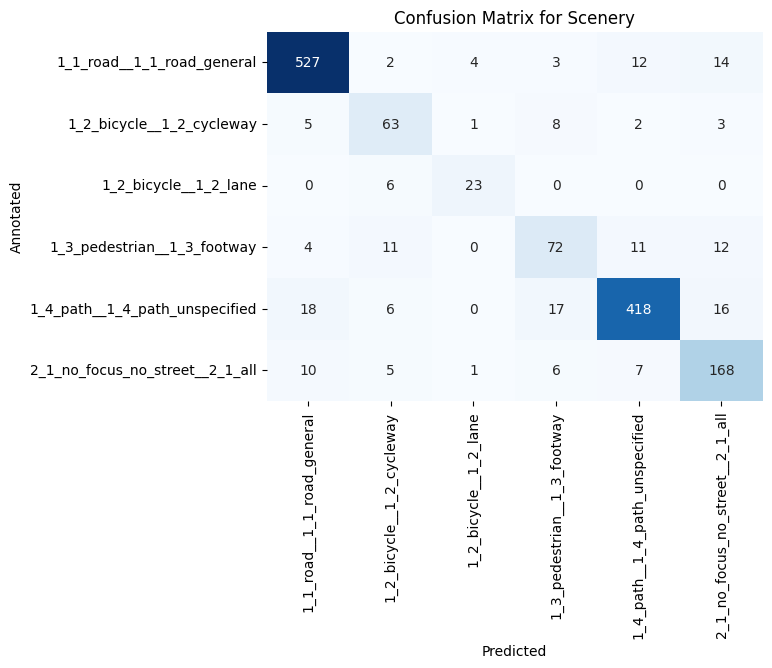

In [27]:
# Plotting the confusion matrix using seaborn heatmap

cm = confusion_matrix(df.scenery_label_true, df.scenery_label_pred, labels=valid_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=valid_labels,
            yticklabels=valid_labels)
plt.title(f"Confusion Matrix for Scenery")
plt.xlabel("Predicted")
plt.ylabel("Annotated")
plt.show()



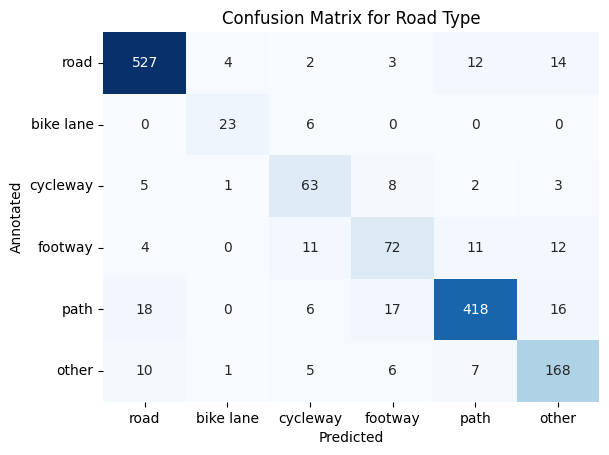

In [29]:
# validation
# Plotting the confusion matrix using seaborn heatmap
labels_valid = ["1_1_road__1_1_road_general", "1_2_bicycle__1_2_lane", "1_2_bicycle__1_2_cycleway", "1_3_pedestrian__1_3_footway", "1_4_path__1_4_path_unspecified", "2_1_no_focus_no_street__2_1_all"]
labels_clear = ["road", "bike lane", "cycleway", "footway", "path", "other"]
cm = confusion_matrix(df.scenery_label_true, df.scenery_label_pred, labels=labels_valid)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels_clear,
            yticklabels=labels_clear)
plt.title(f"Confusion Matrix for Road Type")
plt.xlabel("Predicted")
plt.ylabel("Annotated")
# plt.savefig("confusion_matrix_type_v1_0.png", transparent=True, bbox_inches='tight')
plt.show()

In [28]:
df[df.scenery_label_true.isin(valid_labels)]

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
106512744842955,0.915098,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
110578584434317,0.998231,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
112736628188357,0.999913,scenery,1_3_pedestrian__1_3_footway,1,1_3_pedestrian__1_3_footway
113426777698675,0.981857,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
115256483951405,0.669257,scenery,1_3_pedestrian__1_3_footway,1,1_3_pedestrian__1_3_footway
...,...,...,...,...,...
6071685396270338,0.808702,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified
7171799422849372,0.821287,scenery,1_3_pedestrian__1_3_footway,1,1_4_path__1_4_path_unspecified
7255221451185848,0.755733,scenery,1_4_path__1_4_path_unspecified,1,1_4_path__1_4_path_unspecified


In [29]:
# Extract predicted and ground truth values

class_precision = precision_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')
class_recall = recall_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')

print(f"Count: {len(df)}")
print(f"Precision: {round(class_precision, 2)}")
print(f"Recall: {round(class_recall, 2)}")
print("------------------------")


Count: 1455
Precision: 0.88
Recall: 0.87
------------------------


In [30]:
from sklearn.metrics import classification_report

report = classification_report(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred)
print(report)

                                 precision    recall  f1-score   support

     1_1_road__1_1_road_general       0.93      0.94      0.94       562
      1_2_bicycle__1_2_cycleway       0.68      0.77      0.72        82
          1_2_bicycle__1_2_lane       0.79      0.79      0.79        29
    1_3_pedestrian__1_3_footway       0.68      0.65      0.67       110
 1_4_path__1_4_path_unspecified       0.93      0.88      0.90       475
2_1_no_focus_no_street__2_1_all       0.79      0.85      0.82       197

                       accuracy                           0.87      1455
                      macro avg       0.80      0.81      0.81      1455
                   weighted avg       0.88      0.87      0.87      1455



In [32]:
# all images that were incorrectly classified
misclassification = df[(df.scenery_label_pred != df.scenery_label_true) & (df.is_in_validation == 1)]

In [33]:
misclassification = misclassification.sort_values("image_id")
misclassification.reset_index( inplace=True)
misclassification[["image_id", "is_in_validation", "scenery_probability",
                   "scenery_label_true", "scenery_label_pred"]
                   ].to_csv(os.path.join(data_path, "misclassification_scenery_v4.csv"), index=False)

In [36]:
# store missclassified images in folder
import shutil

path = os.path.join(root_data_path, "misclassified_images", "valid_dataset")
folder_list = ["classified_images","classified_images_add_on", "classified_images_add_on_b", "classified_images_add_on_c"]
os.makedirs(path, exist_ok=True)
for i in range(len(misclassification)):  # len(misclassification)
    is_found = False
    img = misclassification.loc[i]
    destination_folder_path = os.path.join(path, img.scenery_label_true, img.scenery_label_pred)
    os.makedirs(destination_folder_path, exist_ok=True)
    destination_path = os.path.join(destination_folder_path, f"{img.image_id}.jpg")
    folders = img.scenery_label_true.split("__")
    for folder in folder_list:
        img_path = os.path.join(root_data_path, folder)
        image_filename = os.path.join(img_path, folders[0], folders[1], f"{img.image_id}.jpg")
        if os.path.exists(image_filename):
            is_found = True
            shutil.copy(image_filename, destination_folder_path)
            break
    if not is_found:
        print(f"{img.image_id} not found.")

200667111667467 not found.
296024502118434 not found.
709098773461112 not found.
933492844633072 not found.
5189827941103180 not found.


In [52]:
# store missclassified images in folder
# path = "/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/metadata/model_predictions/VGG16_V4_not_annotated/missclassified_wo_nostreet"
# os.makedirs(path, exist_ok=True)
# for image_id in misclassification_wo_nostreet.index:
#     destination_path = os.path.join(path, f"{image_id}.jpg")
#     image_filename = os.path.join("/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/unsorted_images", f"{image_id}.jpg")
#     shutil.copy(image_filename, destination_path)